# The Sparks Foundation (Graduate Rotational Internship Program)
### Name : Yash Vora
### Date : September, 2021
<hr>

# Task #6 : Prediction using Decision Tree Algorithm
### Problem Statement : Using Decision Tree classifier predict Species based on SepalLengthCm, SepalWidthCm etc and represent it visually with iris dataset.
### Dataset Link : https://bit.ly/3kXTdox

### There are six columns in this dataset,
- <i>id</i>
- <i>SepalLengthCm</i> - Length of sepal(in cm).
- <i>SepalWidthCm</i> - Width of sepal(in cm).
- <i>PetalLengthCm</i> - Length of petal(in cm).
- <i>PetalWidthCm</i> - Width of petal(in cm).
- <i>Species</i> - Specie name.

## Import Required Libraries

In [64]:
# For Data Analysis
import pandas as pd

# For Mathematical Operations
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

# For Train Test Split
from sklearn.model_selection import train_test_split

# For Model Creation
from sklearn.tree import DecisionTreeClassifier

# For Model Evaluation
from sklearn.metrics import r2_score,confusion_matrix,classification_report

# For Visualizing Decision Tree
from sklearn.tree import plot_tree

## Load Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Dropping Id column as it is not needed

In [3]:
df = df.drop(['Id'],axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Statistical analysis of the data

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Basic information of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Check null values

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Pairplot for multivariate analysis

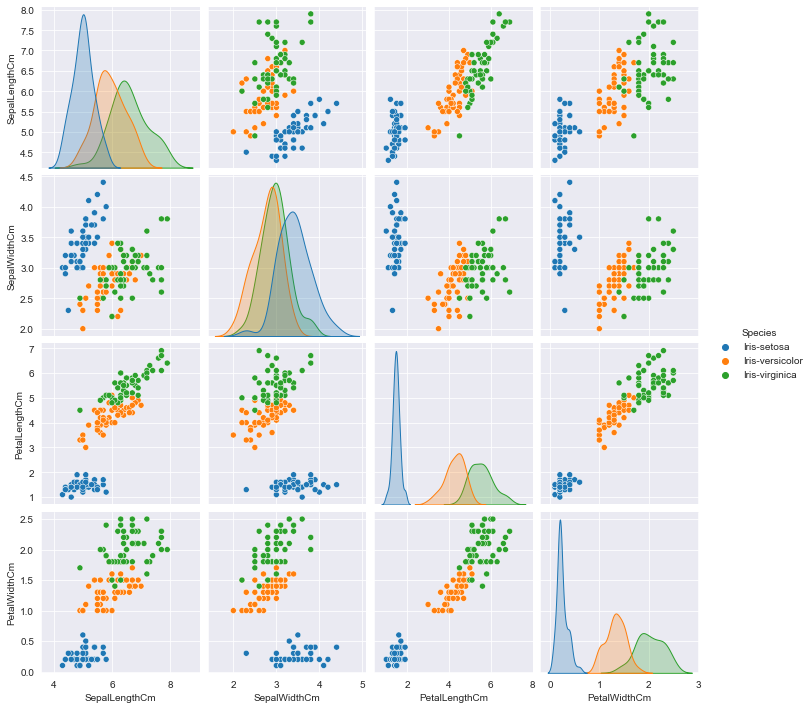

In [29]:
sns.pairplot(df, hue='Species')

## Bar plot for unique values count in Species column

<AxesSubplot:>

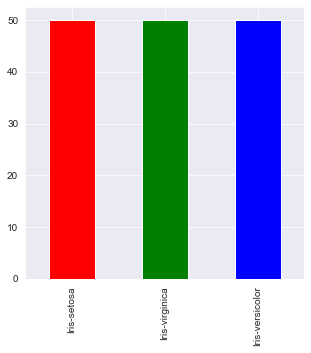

In [20]:
plt.figure(figsize=(5,5))
df['Species'].value_counts().plot(kind='bar', color=['red','green','blue'])

## Box plot for Species and SepalLengthCm

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

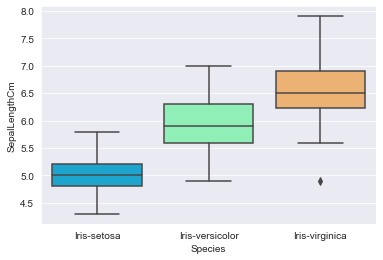

In [26]:
sns.boxplot(x='Species', y='SepalLengthCm', palette="rainbow", data=df)

## Box plot for Species and PetalLengthCm

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

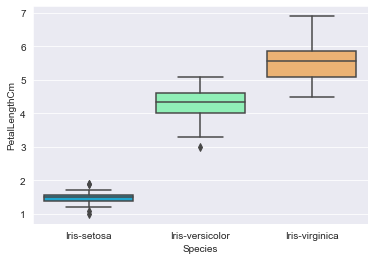

In [25]:
sns.boxplot(x='Species', y='PetalLengthCm', palette="rainbow", data=df)

## Correlation with heat map

<AxesSubplot:>

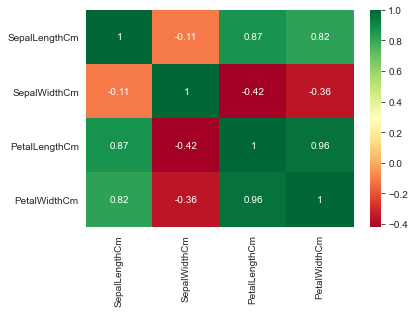

In [28]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

## Converting categorical column Species into numeric

In [31]:
dic = {
    'Iris-setosa' : 1,
    'Iris-virginica' : 2,
    'Iris-versicolor' : 3
}

In [34]:
for key,value in dic.items():
    df['Species'].replace(key,value,inplace=True)
    
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [36]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

## Splitting Data

In [37]:
# Dividing data into dependent and independent variables
x = df.drop('Species',axis=1)
y = df['Species']

In [38]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Species, dtype: int64

## Train Test Split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [63]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

## Model Initialization

In [43]:
DTC = DecisionTreeClassifier()

## Fit the data

In [ ]:
# Always keep the independent variable first and then dependent variable

In [44]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

## Accuracy

In [61]:
print('Training Accuracy :',DTC.score(x_train,y_train)*100,'%')
print('Testing Accuracy :',DTC.score(x_test,y_test)*100,'%')

Training Accuracy : 100.0 %
Testing Accuracy : 97.36842105263158 %


## Model Evaluation

In [47]:
y_pred = DTC.predict(x_test)
y_pred

array([2, 3, 1, 2, 1, 2, 1, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 1, 1, 2, 3,
       1, 1, 2, 1, 1, 3, 3, 1, 2, 3, 1, 2, 2, 3, 1, 2], dtype=int64)

In [51]:
y_actual = y_test
y_actual.head(10)

114    2
62     3
33     1
107    2
7      1
100    2
40     1
86     3
76     3
71     3
Name: Species, dtype: int64

### Confusion Matrix

In [53]:
confusion_matrix = confusion_matrix(y_actual,y_pred)
confusion_matrix

array([[13,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 15]], dtype=int64)

### Classification Report

In [57]:
report = classification_report(y_actual,y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.90      1.00      0.95         9
           3       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



### R2 Score

In [54]:
r2score = r2_score(y_actual,y_pred)
r2score

0.9652333028362305

## Visualizing Decision Tree

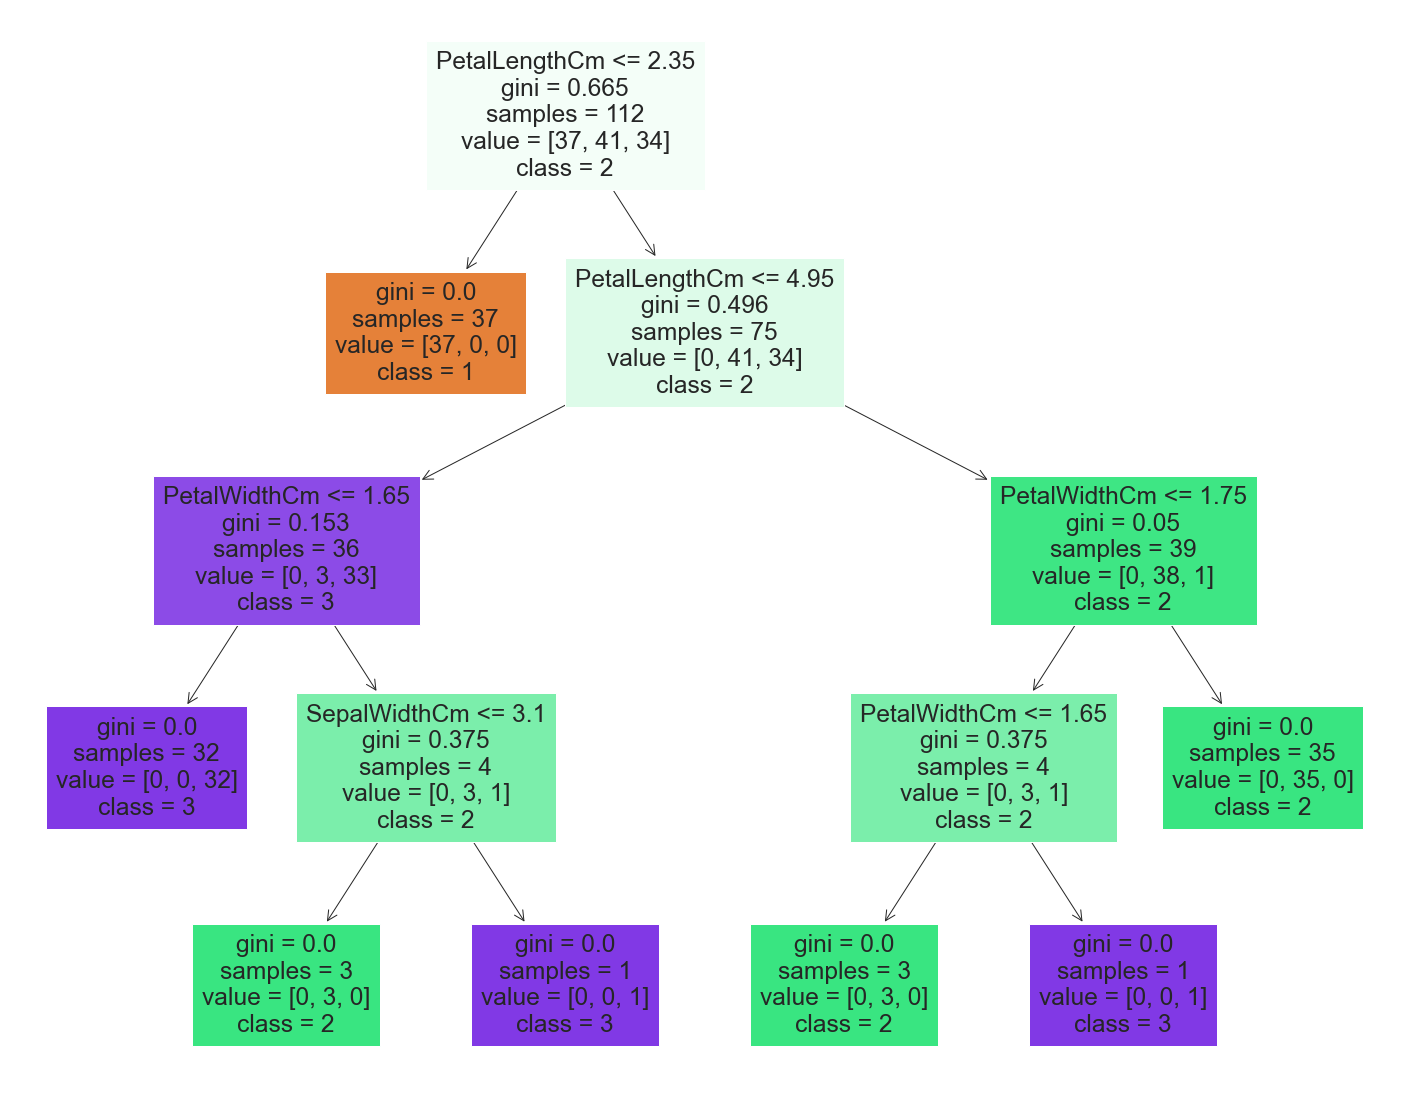

In [70]:
plt.figure(figsize=(25,20))
VDT = plot_tree(DTC,
                feature_names=x.columns,
                class_names=['1','2','3'],
                filled=True)

If you have any queries regarding this solution then please write it below in the comment box and also share your thougths.

## ---------------------------------------------------------Thank You-----------------------------------------------------